In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

URL='https://data.seattle.gov/api/views/mdbt-9ykn/rows.csv?accessType=DOWNLOAD'

def get_freemont_data(filename='Fremont.csv',url=URL,force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url,filename)
    data=pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True)
    data.columns=['West','East']
    data['Total']=data['West']+data['East']   
    return data

In [2]:
data=get_freemont_data()
data.head()

,West,East,Total
Date,,,
2017-01-01,27417,22388,49805
2018-12-01,28397,18544,46941
2016-11-01,35493,28604,64097
2016-02-01,30674,29707,60381
2016-12-01,21552,17385,38937


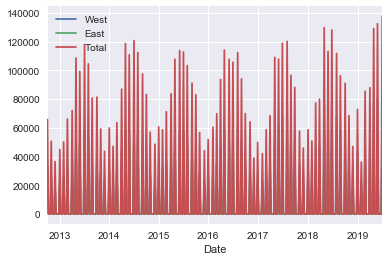

In [3]:
%matplotlib inline
data.resample('W').sum().plot();

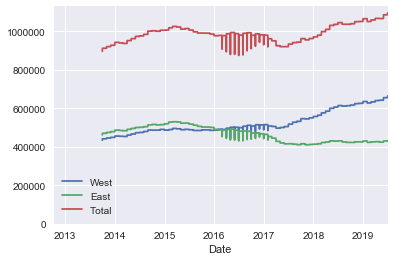

In [4]:


ax=data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

In [5]:
data.groupby(data.index.time).mean()

,West,East,Total
00:00:00,43964.304878,38388.707317,82353.012195


In [6]:
pivoted=data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01
00:00:00,65695,50647,36369,44884,50027
